# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

一个神经元计算示例：

输入为[x1,x2,x3...],进行加和计算，得到[W1X1+B1,W2X2+B2,...](实际是直接进行矩阵运算）

将所得list求和，带入到激活函数𝜎(x)计算（非线性变换），并输出值。

𝑧=𝑤^𝑇 𝑥+𝑏
𝑎=𝜎(𝑧)
𝑎即为输出值                                            


####  2. Why we use non-linear activation funcitons in neural networks?

非线性映射使得隐藏层的设置有意义：

给出双层线性映射神经网络的case：

1层：node1 node2

2层：node3

node3的输出 = 𝜎(W1X1+B1 + W2X2+B2) = W3(W1X1+B1 + W2X2+B2) + B3 = (W1+W2)W3 = W3W1X1 + W2W3X2 + (W3B1+W3B2+B3)

而一层的神经网络输出为：

1层：node1 node2

输出 = W4X1+W5X2 + B4，若W4 = W3W1，W5 = W2W3，B4 = W3B1+W3B2+B3,则可见线性映射的隐藏层没有意义

#### 3. What is the 'Logistic Loss' ?

Logistic Loss是交叉熵损失在二分类问题下的应用，Logistic Loss = —1/m[( ∑ y * log(y)) + ( ∑ (1-y) * log(1-y))],(设有m个样本)

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

选C，sigmoid函数可以把上一层神经元的结果归一化到[0,1]区间，使得在二分类问题中具备解释性意义

#### 5. Why we don't use zero initialization for all parameters ?

如果都使用0初始化，会导致神经元之间没有差异性（学习到的东西都是一样的）

#### 6. Can you implement the softmax function using python ? 

In [2]:
def softmax(X):
    #softmax函数
    return np.exp(X) / np.sum(np.exp(X))

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [4]:
# Loading the data 
digits = datasets.load_digits()

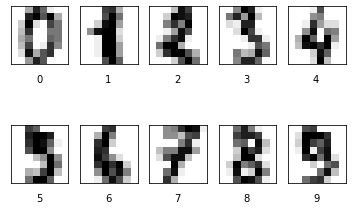

In [5]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [7]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [9]:
x_train = X_train.reshape(-1,X_train.shape[0])
x_train.shape

(64, 1437)

#### 3- Architecture of the neural network

![title](./networks.png)

In [10]:
!pwd

/Users/junjiexie/NLP学习


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [10]:
import numpy as np
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1 + np.exp(-1 * z))
    
    return s

In [11]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [12]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,1)
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [13]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - biaA
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) #损失函数这里最好加一个小数，防止除0
#     print(cost)

    
    dw = 1/m * np.dot(X,(A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [14]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=True):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [63]:
import matplotlib.pyplot as plt

In [20]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X) + b)
    
    for j in range(A.shape[1]):
        if A[0,j] > 0.5:
            Y_prediction[0,j] = 1
        else:
            Y_prediction[0,j] = 0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [65]:
x_train = X_train.reshape(-1,X_train.shape[0])
x_train.shape

(64, 1437)

In [66]:
x_train.shape[0]

64

In [67]:
y_train.reshape(-1,y_train.shape[0]).shape

(1, 1437)

In [17]:
from sklearn.preprocessing import scale

In [21]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost=True):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations 这里我想改成500，print太多了
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    # 数据修改为一维,参数和梯度函数能够接受的维度规格（64，sample个数）
    x_train = scale(X_train.reshape(-1,X_train.shape[0])) 
    y_train = Y_train.reshape(-1,Y_train.shape[0])
    x_test = scale(X_test.reshape(-1,X_test.shape[0])) 
    y_test = Y_test.reshape(-1,Y_test.shape[0])

    
    # 初始化参数
    w,b = initialize_parameters(x_train.shape[0])
    
    # params:更新后的网络参数
    # grads:最新的梯度(下降损失)
    # costs:每次更新的损失列表
    params, grads, costs = optimize(w,b,x_train,y_train,num_iterations,learning_rate,print_cost)
    
    # 获取训练的参数
    new_w = params["w"]
    new_b = params["b"]
    
    # 预测结果
    y_prediction_train = predict(new_w,new_b,x_train)
    y_prediction_test = predict(new_w,new_b,x_test)

    
    # 打印准确率
    print("training set‘s accuracy：{}".format(np.sum(y_prediction_train == y_train)/ y_train.shape[1]))
    print("testing set’s accuracy：{}".format(np.sum(y_prediction_test == y_test)/ y_test.shape[1]))
    
    # 打印准确率
#     plt.plot(range(len(costs),costs))
#     print("训练集准确率: {} ".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
#     print("测试集准确率: {} ".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return costs

In [22]:
costs_1 = model(X_train, y_train, X_test, y_test, num_iterations=15000, learning_rate=0.005)
costs_2 = model(X_train, y_train, X_test, y_test, num_iterations=15000, learning_rate=0.010)

Cost after iteration 0: 4.024492
Cost after iteration 500: 2.386687
Cost after iteration 1000: 2.128614
Cost after iteration 1500: 1.899825
Cost after iteration 2000: 1.685784
Cost after iteration 2500: 1.488767
Cost after iteration 3000: 1.311347
Cost after iteration 3500: 1.156076
Cost after iteration 4000: 1.025068
Cost after iteration 4500: 0.919464
Cost after iteration 5000: 0.838812
Cost after iteration 5500: 0.780695
Cost after iteration 6000: 0.741082
Cost after iteration 6500: 0.715313
Cost after iteration 7000: 0.699113
Cost after iteration 7500: 0.689140
Cost after iteration 8000: 0.683061
Cost after iteration 8500: 0.679364
Cost after iteration 9000: 0.677109
Cost after iteration 9500: 0.675727
Cost after iteration 10000: 0.674874
Cost after iteration 10500: 0.674345
Cost after iteration 11000: 0.674014
Cost after iteration 11500: 0.673806
Cost after iteration 12000: 0.673675
Cost after iteration 12500: 0.673591
Cost after iteration 13000: 0.673538
Cost after iteration 1350

利用Keras库验证下逻辑回归正常正确率

In [75]:
import keras

from keras.layers import Dense
from keras.models import Sequential

In [76]:
x_k_train = scale(X_train.reshape(X_train.shape[0],-1)) 
y_k_train = y_train.reshape(y_train.shape[0],-1)
x_k_test = scale(X_test.reshape(X_test.shape[0],-1)) 
y_k_test = y_test.reshape(y_test.shape[0],-1)

In [77]:
model = Sequential()

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['binary_crossentropy'])

model.fit(x_k_train, y_k_train, epochs=50, batch_size=64)

Epoch 1/50
1437/1437 [==============================] - 1s 438us/step - loss: 0.7466 - binary_crossentropy: 0.7466
Epoch 2/50
1437/1437 [==============================] - 0s 20us/step - loss: 0.6812 - binary_crossentropy: 0.6812
Epoch 3/50
1437/1437 [==============================] - 0s 19us/step - loss: 0.6304 - binary_crossentropy: 0.6304
Epoch 4/50
1437/1437 [==============================] - 0s 20us/step - loss: 0.5903 - binary_crossentropy: 0.5903
Epoch 5/50
1437/1437 [==============================] - 0s 20us/step - loss: 0.5575 - binary_crossentropy: 0.5575
Epoch 6/50
1437/1437 [==============================] - 0s 20us/step - loss: 0.5307 - binary_crossentropy: 0.5307
Epoch 7/50
1437/1437 [==============================] - 0s 20us/step - loss: 0.5086 - binary_crossentropy: 0.5086
Epoch 8/50
1437/1437 [==============================] - 0s 21us/step - loss: 0.4892 - binary_crossentropy: 0.4892
Epoch 9/50
1437/1437 [==============================] - 0s 20us/step - loss: 0.4727 - b

In [78]:
output = []
for i in model.predict(x_k_test):
    if i > 0.5:
        output.append([1])
    else:
        output.append([0])

Keras实现的逻辑回归的正确率有百分之88%，说明手动实现出现了问题，但暂时检查不出来，希望老师指正

In [80]:
output = np.array(output)
print(np.sum(output == y_k_test)/ y_k_test.shape[0])

0.8805555555555555


### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [81]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot([i*100 for i in range(len(costs_1))], costs_1)
ax.set_xlabel("Iteration Times")
ax.set_ylabel("Logistic Loss")
ax.set_title("learning_rate=0.005")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'learning_rate=0.005')

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot([i*100 for i in range(len(costs_2))], costs_2)
ax.set_xlabel("Iteration Times")
ax.set_ylabel("Logistic Loss")
ax.set_title("learning_rate=0.010")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'learning_rate=0.010')

可以发现使用小学习率，更高的迭代次数，可以更加有效地降低Logistics Loss，当损失下降到一定程度，就会出现梯度更新越过了最低点情况，使得Loss不再降低

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [86]:
costs_3 = model(X_train, y_train, X_test, y_test, num_iterations=5000, learning_rate=0.001)
costs_4 = model(X_train, y_train, X_test, y_test, num_iterations=10000, learning_rate=0.001)

Cost after iteration 0: 3.188711
Cost after iteration 500: 2.606217
Cost after iteration 1000: 2.293976
Cost after iteration 1500: 2.142710
Cost after iteration 2000: 2.061242
Cost after iteration 2500: 2.005380
Cost after iteration 3000: 1.958605
Cost after iteration 3500: 1.915245
Cost after iteration 4000: 1.873422
Cost after iteration 4500: 1.832534
training set‘s accuracy：0.5149617258176757
testing set’s accuracy：0.5138888888888888
Cost after iteration 0: 2.357840
Cost after iteration 500: 2.231999
Cost after iteration 1000: 2.151707
Cost after iteration 1500: 2.089928
Cost after iteration 2000: 2.035542
Cost after iteration 2500: 1.984303
Cost after iteration 3000: 1.934669
Cost after iteration 3500: 1.886101
Cost after iteration 4000: 1.838422
Cost after iteration 4500: 1.791580
Cost after iteration 5000: 1.745570
Cost after iteration 5500: 1.700397
Cost after iteration 6000: 1.656074
Cost after iteration 6500: 1.612617
Cost after iteration 7000: 1.570040
Cost after iteration 75

这里出现了过拟合现象。当迭代次数更高时，模型对训练集的拟合程度更高，在欠拟合条件下出现测试集准确率提升的现象，而在过拟合条件下出现测试集准确率下降的现象

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 